In [1]:
import commot as ct
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:

data_path = '/path/to/'

adata = sc.read_visium(data_path + "/Visium/SpaceRanger/1", count_file='filtered_feature_bc_matrix.h5')

adata.var_names_make_unique()

# QC
sc.pp.calculate_qc_metrics(adata, inplace=True)

adata.layers['counts'] = adata.X
adata.obsm['spatial'] = np.array(adata.obsm['spatial'], dtype=int)

print(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 2185 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'
    layers: 'counts'


In [5]:
adata.obsm['spatial']

array([[10928,  6966],
       [ 2608,  1904],
       [10395,  8109],
       ...,
       [ 1017,  2814],
       [ 1412,  3273],
       [ 7879,  8559]])

In [6]:
adata.uns['spatial']

{'1': {'images': {'hires': array([[[0.04313726, 0.04313726, 0.04313726],
           [0.0627451 , 0.06666667, 0.06666667],
           [0.0627451 , 0.06666667, 0.0627451 ],
           ...,
           [0.6862745 , 0.70980394, 0.69803923],
           [0.6862745 , 0.7058824 , 0.69803923],
           [0.45882353, 0.47058824, 0.46666667]],
   
          [[0.48235294, 0.4862745 , 0.48235294],
           [0.7137255 , 0.7254902 , 0.72156864],
           [0.70980394, 0.7176471 , 0.7137255 ],
           ...,
           [0.8745098 , 0.89411765, 0.8862745 ],
           [0.87058824, 0.89411765, 0.8862745 ],
           [0.5803922 , 0.59607846, 0.5921569 ]],
   
          [[0.58431375, 0.5921569 , 0.58431375],
           [0.87058824, 0.8784314 , 0.8745098 ],
           [0.8627451 , 0.8745098 , 0.8666667 ],
           ...,
           [0.87058824, 0.8901961 , 0.8862745 ],
           [0.8666667 , 0.8901961 , 0.88235295],
           [0.5803922 , 0.5921569 , 0.5882353 ]],
   
          ...,
   
          [[

In [7]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [8]:

df_ligrec=pd.concat([ct.pp.ligand_receptor_database(database='CellChat', species='human'), 
                     ct.pp.ligand_receptor_database(database='CellPhoneDB_v4.0', species='human')], axis=0, ignore_index=True).drop_duplicates()
df_ligrec

,0,1,2,3
0,TGFB1,TGFBR1_TGFBR2,TGFb,Secreted Signaling
1,TGFB2,TGFBR1_TGFBR2,TGFb,Secreted Signaling
2,TGFB3,TGFBR1_TGFBR2,TGFb,Secreted Signaling
3,TGFB1,ACVR1B_TGFBR2,TGFb,Secreted Signaling
4,TGFB1,ACVR1C_TGFBR2,TGFb,Secreted Signaling
...,...,...,...,...
2641,ALDH1A2,RXRB_CRABP2,NaN,Secreted Signaling
2642,ALDH1A3,RXRB_CRABP2,NaN,Secreted Signaling
2643,ALDH1A1,RXRG_CRABP2,NaN,Secreted Signaling
2644,ALDH1A2,RXRG_CRABP2,NaN,Secreted Signaling


In [9]:
df_ligrec[df_ligrec.apply(lambda x: x.str.contains('CXCL13')).any(axis=1)]

,0,1,2,3
674,CXCL13,ACKR1,CXCL,Secreted Signaling
709,CXCL13,CXCR3,CXCL,Secreted Signaling
714,CXCL13,CXCR5,CXCL,Secreted Signaling
1632,CXCL13,CXCR5,NaN,Secreted Signaling
1633,CXCL13,ACKR4,NaN,Secreted Signaling


In [10]:

ligand_gene = 'CXCL13'
receptor_gene = 'CXCR5'


ligand_exists = ligand_gene in adata.var_names
receptor_exists = receptor_gene in adata.var_names

print(f"Ligand {ligand_gene} exists in adata.var_names: {ligand_exists}")
print(f"Receptor {receptor_gene} exists in adata.var_names: {receptor_exists}")


Ligand CXCL13 exists in adata.var_names: True
Receptor CXCR5 exists in adata.var_names: True


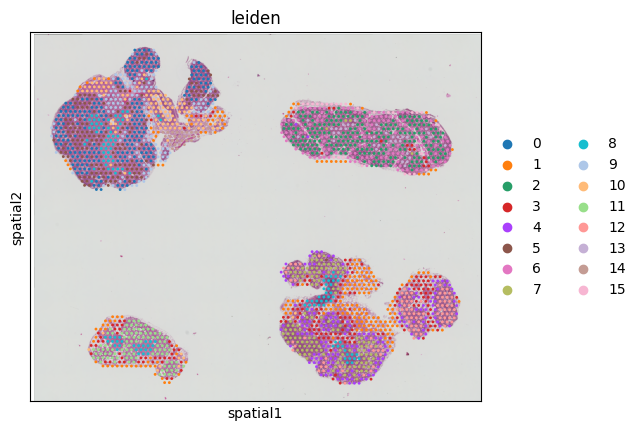

In [11]:
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=1)
sc.pl.spatial(adata, color='leiden')

In [12]:

ligand_gene = 'CXCL13'
receptor_gene = 'CXCR5'


ligand_exists = ligand_gene in adata.var_names
receptor_exists = receptor_gene in adata.var_names

print(f"Ligand {ligand_gene} exists in adata.var_names: {ligand_exists}")
print(f"Receptor {receptor_gene} exists in adata.var_names: {receptor_exists}")


Ligand CXCL13 exists in adata.var_names: True
Receptor CXCR5 exists in adata.var_names: True


In [13]:
print(df_ligrec.shape)

(2642, 4)


In [14]:
ct.tl.spatial_communication(adata,
    database_name='user_database', df_ligrec=df_ligrec, dis_thr=500, heteromeric=True, pathway_sum=True)

In [15]:
adata.obsm['commot-user_database-sum-sender']

,s-GDF9-TGFBR1_BMPR2,s-GDF9-ACVR1B_BMPR2,s-NRG2-ERBB2_ERBB4,s-NRG2-ERBB3,s-NRG2-ERBB4,s-NRG2-ERBB2_ERBB3,s-CCL3L1-DPP4,s-CCL3L1-CCR1,s-CCL3L1-ACKR2,s-CCL3L1-CCR3,...,s-UGRP1,s-UROTENSIN,s-VEGF,s-VEGI,s-VIP,s-VISFATIN,s-WNT,s-XCR,s-nan,s-ncWNT
AACAATGGAACCACAT-1,0.000000,0.000000,0.047698,0.991200,0.212847,0.900652,0.0,0.0,0.0,0.0,...,0.0,0.0,0.062005,1.227936,0.0,0.000000,11.088205,0.0,83.084070,4.551178
AACAATGTGCTCCGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.251973,0.000000,0.0,1.495391,8.472166,0.0,40.746039,0.000000
AACACCTAAGCATTGC-1,0.000000,0.000000,0.127399,0.308268,0.128793,0.315254,0.0,0.0,0.0,0.0,...,0.0,0.0,0.182713,0.000000,0.0,0.396504,3.253635,0.0,41.290805,1.394633
AACAGTATCCGCCTGG-1,0.217817,0.347327,0.261739,0.438452,0.266706,0.444669,0.0,0.0,0.0,0.0,...,0.0,0.0,0.471393,0.000000,0.0,0.000000,0.000000,0.0,37.141741,2.275416
AACATAGGAGGCGTCC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.472101,0.000000,0.0,0.000000,0.000000,0.0,34.682449,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTCCGAGTGCCGAT-1,0.000000,0.000000,0.148533,0.293443,0.163099,0.251312,0.0,0.0,0.0,0.0,...,0.0,0.0,0.576840,0.000000,0.0,1.249278,2.752525,0.0,37.891254,2.329766
TGTTCGCACGGCCGGC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,11.535693,10.169030
TGTTGGAGCCGCGACG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.314442,0.609526,0.0,0.584458,6.933761,0.0,40.662292,3.504972
TGTTGGATAGATCAGA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.193470,0.000000,0.0,0.802709,9.920961,0.0,47.471108,0.000000


In [16]:

column_names_list = adata.obsm['commot-user_database-sum-sender'].columns.tolist()


for column_name in column_names_list:
    print(column_name)

s-GDF9-TGFBR1_BMPR2
s-GDF9-ACVR1B_BMPR2
s-NRG2-ERBB2_ERBB4
s-NRG2-ERBB3
s-NRG2-ERBB4
s-NRG2-ERBB2_ERBB3
s-CCL3L1-DPP4
s-CCL3L1-CCR1
s-CCL3L1-ACKR2
s-CCL3L1-CCR3
s-CX3CL1-CX3CR1
s-SULT1A1-PPARG
s-SULT1A1-PPARA
s-ASIP-MC1R
s-PROK2-PROKR1
s-NPPC-NPR3
s-NPPC-NPR1
s-NPPC-NPR2
s-PENK-OPRM1
s-PENK-OPRK1
s-PENK-MRGPRX1
s-PENK-OPRD1
s-PENK-OPRL1
s-MST1-MST1R
s-COL4A2-ITGB1_ITGA1
s-COL4A2-ITGB1_ITGA10
s-COL4A2-ITGB1_ITGA2
s-COL4A2-ITGB1_ITGA11
s-PDGFC-FLT4
s-PDGFC-PDGFRA
s-WNT9B-FZD1_LRP5
s-WNT9B-FZD8_LRP6
s-WNT9B-FZD10_LRP5
s-WNT9B-FZD7_LRP6
s-WNT9B-FZD8_LRP5
s-WNT9B-FZD3_LRP5
s-WNT9B-FZD4_LRP5
s-WNT9B-FZD5_LRP6
s-WNT9B-FZD6_LRP5
s-WNT9B-FZD3_LRP6
s-WNT9B-FZD2_LRP5
s-WNT9B-FZD1_LRP6
s-WNT9B-FZD9_LRP6
s-WNT9B-FZD2_LRP6
s-WNT9B-FZD4_LRP6
s-WNT9B-FZD6_LRP6
s-WNT9B-FZD7_LRP5
s-WNT9B-FZD5_LRP5
s-WNT9B-FZD10_LRP6
s-WNT9B-FZD9_LRP5
s-CD40LG-ITGA5_ITGB1
s-CD40LG-ITGB1_ITGA5
s-CD40LG-CD40
s-CD40LG-ITGAM_ITGB2
s-CD40LG-ITGA2B_ITGB3
s-INHBA_INHBB-ACVR1C_ACVR2A
s-INHBA_INHBB-ACVR1_ACVR2B
s-INHBA_INHBB-ACVR

In [17]:
adata.obsm['commot-user_database-sum-receiver']

,r-GDF9-TGFBR1_BMPR2,r-GDF9-ACVR1B_BMPR2,r-NRG2-ERBB2_ERBB4,r-NRG2-ERBB3,r-NRG2-ERBB4,r-NRG2-ERBB2_ERBB3,r-CCL3L1-DPP4,r-CCL3L1-CCR1,r-CCL3L1-ACKR2,r-CCL3L1-CCR3,...,r-UGRP1,r-UROTENSIN,r-VEGF,r-VEGI,r-VIP,r-VISFATIN,r-WNT,r-XCR,r-nan,r-ncWNT
AACAATGGAACCACAT-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.395906,0.0,66.445861,1.912960
AACAATGTGCTCCGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.113578,4.750537,0.0,60.219478,2.238814
AACACCTAAGCATTGC-1,0.000000,0.000000,0.000000,0.251897,0.000000,0.436954,0.000081,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.214295,0.000000,0.000000,2.846691,0.0,33.273632,1.017495
AACAGTATCCGCCTGG-1,0.000000,0.228587,0.269351,0.387637,0.266599,0.507649,0.000000,0.000000,0.039886,0.0,...,0.0,0.0,0.000000,0.244852,0.002438,0.166019,2.219239,0.0,41.088481,1.473664
AACATAGGAGGCGTCC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023651,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.039688,0.000000,0.0,16.654337,1.828822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTCCGAGTGCCGAT-1,0.000000,0.000000,0.157271,0.280686,0.157298,0.185242,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.696291,0.381492,0.000000,1.189611,2.977448,0.0,47.057741,1.331722
TGTTCGCACGGCCGGC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000016,0.000000
TGTTGGAGCCGCGACG-1,0.016704,0.034816,0.000000,0.061073,0.000000,0.063974,0.000167,0.000115,0.000000,0.0,...,0.0,0.0,0.966975,0.000000,0.000168,0.215372,6.572711,0.0,48.640823,1.948006
TGTTGGATAGATCAGA-1,0.002024,0.003411,0.288629,0.052133,0.094170,0.068252,0.006599,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000428,0.579934,3.158688,0.0,46.845027,1.099881


In [18]:

column_names_list = adata.obsm['commot-user_database-sum-receiver'].columns.tolist()


for column_name in column_names_list:
    print(column_name)

r-GDF9-TGFBR1_BMPR2
r-GDF9-ACVR1B_BMPR2
r-NRG2-ERBB2_ERBB4
r-NRG2-ERBB3
r-NRG2-ERBB4
r-NRG2-ERBB2_ERBB3
r-CCL3L1-DPP4
r-CCL3L1-CCR1
r-CCL3L1-ACKR2
r-CCL3L1-CCR3
r-CX3CL1-CX3CR1
r-SULT1A1-PPARG
r-SULT1A1-PPARA
r-ASIP-MC1R
r-PROK2-PROKR1
r-NPPC-NPR3
r-NPPC-NPR1
r-NPPC-NPR2
r-PENK-OPRM1
r-PENK-OPRK1
r-PENK-MRGPRX1
r-PENK-OPRD1
r-PENK-OPRL1
r-MST1-MST1R
r-COL4A2-ITGB1_ITGA1
r-COL4A2-ITGB1_ITGA10
r-COL4A2-ITGB1_ITGA2
r-COL4A2-ITGB1_ITGA11
r-PDGFC-FLT4
r-PDGFC-PDGFRA
r-WNT9B-FZD1_LRP5
r-WNT9B-FZD8_LRP6
r-WNT9B-FZD10_LRP5
r-WNT9B-FZD7_LRP6
r-WNT9B-FZD8_LRP5
r-WNT9B-FZD3_LRP5
r-WNT9B-FZD4_LRP5
r-WNT9B-FZD5_LRP6
r-WNT9B-FZD6_LRP5
r-WNT9B-FZD3_LRP6
r-WNT9B-FZD2_LRP5
r-WNT9B-FZD1_LRP6
r-WNT9B-FZD9_LRP6
r-WNT9B-FZD2_LRP6
r-WNT9B-FZD4_LRP6
r-WNT9B-FZD6_LRP6
r-WNT9B-FZD7_LRP5
r-WNT9B-FZD5_LRP5
r-WNT9B-FZD10_LRP6
r-WNT9B-FZD9_LRP5
r-CD40LG-ITGA5_ITGB1
r-CD40LG-ITGB1_ITGA5
r-CD40LG-CD40
r-CD40LG-ITGAM_ITGB2
r-CD40LG-ITGA2B_ITGB3
r-INHBA_INHBB-ACVR1C_ACVR2A
r-INHBA_INHBB-ACVR1_ACVR2B
r-INHBA_INHBB-ACVR

Text(0.5, 1.0, 'Receiver')

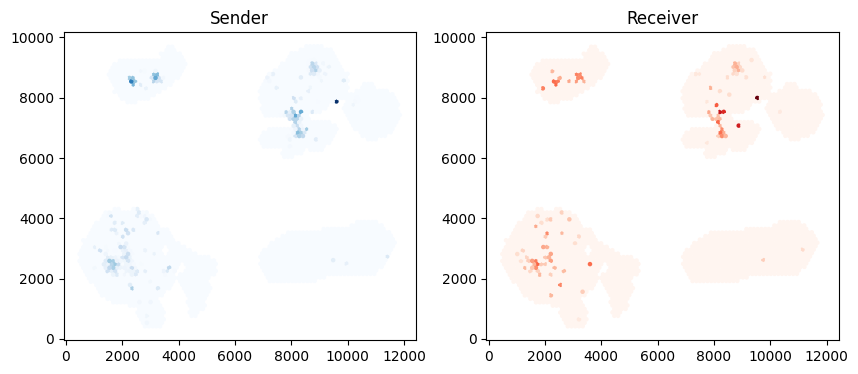

In [19]:
pts = adata.obsm['spatial']
s = adata.obsm['commot-user_database-sum-sender']['s-CXCL13-CXCR5']
r = adata.obsm['commot-user_database-sum-receiver']['r-CXCL13-CXCR5']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='Blues')
ax[0].set_title('Sender')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='Reds')
ax[1].set_title('Receiver')

<Axes: >

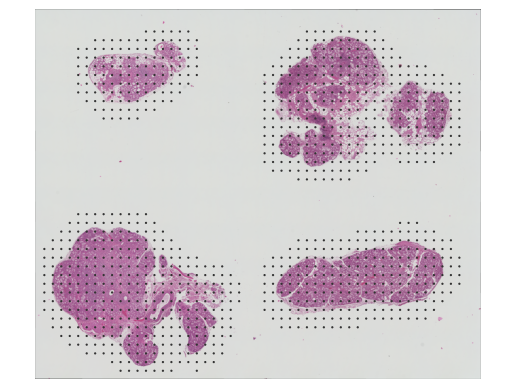

In [20]:
ct.tl.communication_direction(adata, database_name='user_database', lr_pair=('CXCL13','CXCR5'), k=5)
ct.pl.plot_cell_communication(adata, database_name='user_database', lr_pair=('CXCL13','CXCR5'), plot_method='grid', background_legend=True,
    summary='sender', background='image', clustering='leiden', cmap='Alphabet')

<Axes: >

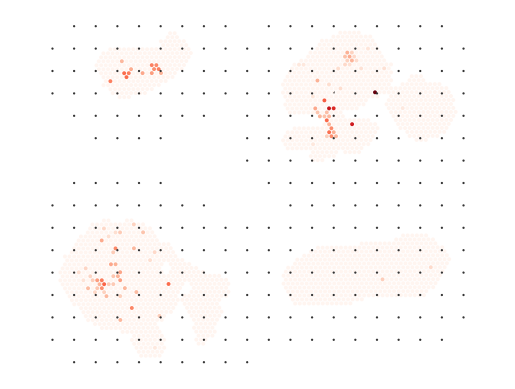

In [21]:
ct.pl.plot_cell_communication(adata, database_name='user_database', lr_pair=('CXCL13','CXCR5'), plot_method='grid', background_legend=True,
    scale=0.00003, ndsize=8, grid_density=0.4, summary='receiver', background='summary', clustering='leiden', cmap='Reds',
    normalize_v = True, normalize_v_quantile=0.995)

In [23]:
ct.tl.cluster_communication(adata, database_name='user_database', pathway_name='CCL', clustering='leiden',
    n_permutations=100)

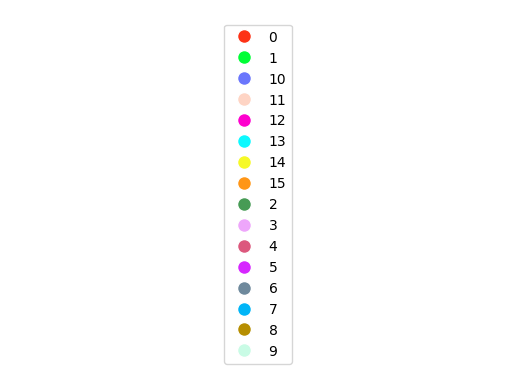

In [24]:
ct.pl.plot_cluster_communication_network(adata, uns_names=['commot_cluster-leiden-user_database-CCL'],
    nx_node_pos=None, nx_bg_pos=False, p_value_cutoff = 5e-2, filename='CCL_cluster.pdf', nx_node_cmap='Light24')

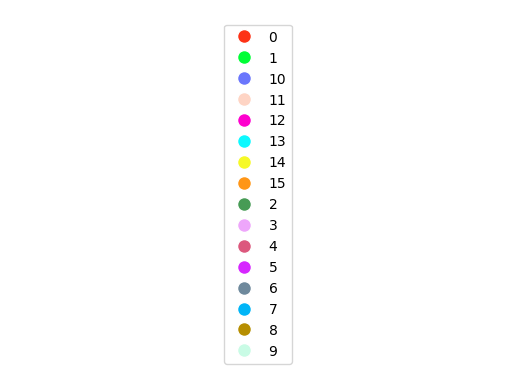

In [25]:
ct.tl.cluster_position(adata, clustering='leiden')
ct.pl.plot_cluster_communication_network(adata, uns_names=['commot_cluster-leiden-user_database-CCL'], clustering='leiden',
    nx_node_pos='cluster', nx_pos_idx=np.array([0, 1]), nx_bg_pos=True, nx_bg_ndsize=0.25, p_value_cutoff=5e-2,
    filename='CCL_cluster_spatial.pdf', nx_node_cmap='Light24')

In [26]:
adata.uns['commot-user_database-info']

{'df_ligrec':        ligand       receptor pathway
 0       TGFB1  TGFBR1_TGFBR2    TGFb
 1       TGFB2  TGFBR1_TGFBR2    TGFb
 2       TGFB3  TGFBR1_TGFBR2    TGFb
 3       TGFB1  ACVR1B_TGFBR2    TGFb
 4       TGFB1  ACVR1C_TGFBR2    TGFb
 ...       ...            ...     ...
 2485  ALDH1A2    RXRB_CRABP2     nan
 2486  ALDH1A3    RXRB_CRABP2     nan
 2487  ALDH1A1    RXRG_CRABP2     nan
 2488  ALDH1A2    RXRG_CRABP2     nan
 2489  ALDH1A3    RXRG_CRABP2     nan
 
 [2490 rows x 3 columns],
 'distance_threshold': 500}

In [27]:
adata.obsm['commot-user_database-sum-sender']

,s-GDF9-TGFBR1_BMPR2,s-GDF9-ACVR1B_BMPR2,s-NRG2-ERBB2_ERBB4,s-NRG2-ERBB3,s-NRG2-ERBB4,s-NRG2-ERBB2_ERBB3,s-CCL3L1-DPP4,s-CCL3L1-CCR1,s-CCL3L1-ACKR2,s-CCL3L1-CCR3,...,s-UGRP1,s-UROTENSIN,s-VEGF,s-VEGI,s-VIP,s-VISFATIN,s-WNT,s-XCR,s-nan,s-ncWNT
AACAATGGAACCACAT-1,0.000000,0.000000,0.047698,0.991200,0.212847,0.900652,0.0,0.0,0.0,0.0,...,0.0,0.0,0.062005,1.227936,0.0,0.000000,11.088205,0.0,83.084070,4.551178
AACAATGTGCTCCGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.251973,0.000000,0.0,1.495391,8.472166,0.0,40.746039,0.000000
AACACCTAAGCATTGC-1,0.000000,0.000000,0.127399,0.308268,0.128793,0.315254,0.0,0.0,0.0,0.0,...,0.0,0.0,0.182713,0.000000,0.0,0.396504,3.253635,0.0,41.290805,1.394633
AACAGTATCCGCCTGG-1,0.217817,0.347327,0.261739,0.438452,0.266706,0.444669,0.0,0.0,0.0,0.0,...,0.0,0.0,0.471393,0.000000,0.0,0.000000,0.000000,0.0,37.141741,2.275416
AACATAGGAGGCGTCC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.472101,0.000000,0.0,0.000000,0.000000,0.0,34.682449,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTCCGAGTGCCGAT-1,0.000000,0.000000,0.148533,0.293443,0.163099,0.251312,0.0,0.0,0.0,0.0,...,0.0,0.0,0.576840,0.000000,0.0,1.249278,2.752525,0.0,37.891254,2.329766
TGTTCGCACGGCCGGC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,11.535693,10.169030
TGTTGGAGCCGCGACG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.314442,0.609526,0.0,0.584458,6.933761,0.0,40.662292,3.504972
TGTTGGATAGATCAGA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.193470,0.000000,0.0,0.802709,9.920961,0.0,47.471108,0.000000


In [28]:
adata.obsm['commot-user_database-sum-receiver']

,r-GDF9-TGFBR1_BMPR2,r-GDF9-ACVR1B_BMPR2,r-NRG2-ERBB2_ERBB4,r-NRG2-ERBB3,r-NRG2-ERBB4,r-NRG2-ERBB2_ERBB3,r-CCL3L1-DPP4,r-CCL3L1-CCR1,r-CCL3L1-ACKR2,r-CCL3L1-CCR3,...,r-UGRP1,r-UROTENSIN,r-VEGF,r-VEGI,r-VIP,r-VISFATIN,r-WNT,r-XCR,r-nan,r-ncWNT
AACAATGGAACCACAT-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.395906,0.0,66.445861,1.912960
AACAATGTGCTCCGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.113578,4.750537,0.0,60.219478,2.238814
AACACCTAAGCATTGC-1,0.000000,0.000000,0.000000,0.251897,0.000000,0.436954,0.000081,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.214295,0.000000,0.000000,2.846691,0.0,33.273632,1.017495
AACAGTATCCGCCTGG-1,0.000000,0.228587,0.269351,0.387637,0.266599,0.507649,0.000000,0.000000,0.039886,0.0,...,0.0,0.0,0.000000,0.244852,0.002438,0.166019,2.219239,0.0,41.088481,1.473664
AACATAGGAGGCGTCC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023651,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.039688,0.000000,0.0,16.654337,1.828822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTCCGAGTGCCGAT-1,0.000000,0.000000,0.157271,0.280686,0.157298,0.185242,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.696291,0.381492,0.000000,1.189611,2.977448,0.0,47.057741,1.331722
TGTTCGCACGGCCGGC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000016,0.000000
TGTTGGAGCCGCGACG-1,0.016704,0.034816,0.000000,0.061073,0.000000,0.063974,0.000167,0.000115,0.000000,0.0,...,0.0,0.0,0.966975,0.000000,0.000168,0.215372,6.572711,0.0,48.640823,1.948006
TGTTGGATAGATCAGA-1,0.002024,0.003411,0.288629,0.052133,0.094170,0.068252,0.006599,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000428,0.579934,3.158688,0.0,46.845027,1.099881


In [29]:
adata.write_h5ad(data_path + "/output/COMMOT_slide1.h5ad")

In [31]:
adata_cp = adata

adata_cp.obsp.clear()
adata_cp.write_h5ad(data_path + "/output/COMMOT_slide1_withoutObsp.h5ad")